In [95]:
import cv2
import copy as c
import matplotlib.pyplot as plt

**Using haar cascade**

In [96]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# img = cv2.imread('./dataset/train/0.jpeg')
# img = cv2.imread('./dataset/train/00006c07d2b033d1.jpg')
img = cv2.imread('./dataset/train/0000bee39176697a.jpg')
img.shape

(727, 1024, 3)

In [97]:
def draw_boundary(img, classifier, scaleFactor, minNeighbors, color, text):
    # Converting image to gray-scale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # detecting features in gray-scale image, returns coordinates, width and height of features
    features = classifier.detectMultiScale(gray_img, scaleFactor, minNeighbors)
    coords = []
    # drawing rectangle around the feature and labeling it
    for (x, y, w, h) in features:
        cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
        cv2.putText(img, text, (x, y-4), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2, cv2.LINE_AA)
        coords = [x, y, w, h]
    return coords, img

In [98]:
def detect(img, faceCascade):
    color = {"blue":(255,0,0), "red":(0,0,255), "green":(0,255,0), "white":(255,255,255)}
    coords, img = draw_boundary(img, faceCascade, 1.1, 10, color['red'], "Face")
    return img

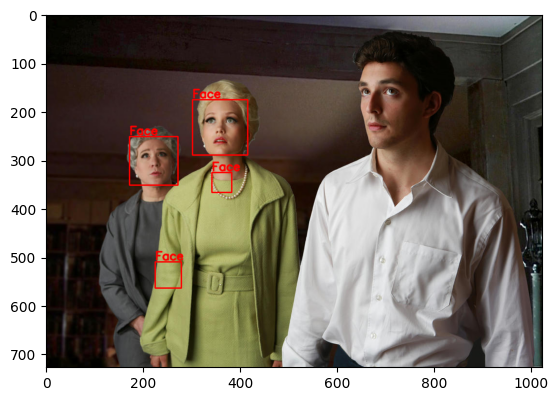

In [99]:
img1 = c.deepcopy(img)
img1 = detect(img1, faceCascade)
rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [100]:
with open("./dataset/train/0000bee39176697a.txt",'r') as f:
    lines = f.readlines()

print(lines)

['0 0.2209375 0.4151388225584594 0.078125 0.14449399999999998\n', '0 0.3569921875 0.32394094910591476 0.085625 0.167401\n', '0 0.6877734375 0.2591553287482806 0.12312500000000004 0.23259900000000003']


In [101]:
x,y,w,h = lines[0][:-1].split(' ')[1:]

In [102]:
print(x)
print(y)
print(w)
print(h)

0.2209375
0.4151388225584594
0.078125
0.14449399999999998


In [103]:
H, W, _ = img.shape
img.shape

(727, 1024, 3)

In [104]:
x = float(x)
y = float(y)
h = float(h)
w = float(w)

In [105]:
x = W*x
y = H*y
w = W*w
h = H*h

In [106]:
x = int(x)
y = int(y)
w = int(w)
h = int(h)

226 301 80 105
365 235 87 121
704 188 126 169


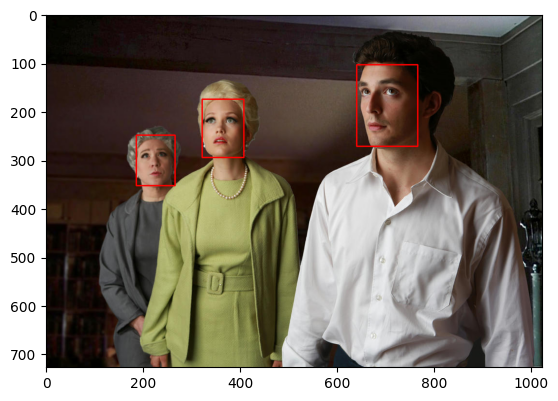

In [107]:
img2 = c.deepcopy(img)
rgb1 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# plt.imshow(cv2.rectangle(rgb1, (x-w//2,y-h//2),(x+w//2,y+h//2),(255,0,0),thickness=2))
for line in lines:
    x,y,w,h = line.split(' ')[1:]
    x = int(float(x) * W)
    y = int(float(y) * H)
    w = int(float(w) * W)
    h = int(float(h) * H)
    print(x,y,w,h)
    cv2.rectangle(rgb1, (x-w//2,y-h//2),(x+w//2,y+h//2),(255,0,0),thickness=2)
plt.imshow(rgb1)